In [1]:
# https://pypi.org/project/ttth-mds5-analyzer/

In [25]:
# !pip install ttth-mds5-analyzer

In [4]:
# !pip install -U ttth-mds5-analyzer

TTTH_Analyzer là gói thư viện hỗ trợ HV môn MDS5 thực hiện các bước phân tích đơn biến và đa biến và kiếm tra 1 số tình trạng của các biến

- Phân tích đơn biến (phân loại và liên tục )  
- Phân tích đa biến (phân loại vs phân loại, phân loại vs liên tục )  
- Phân tích tình trạng outlier của các biến phân loại  
- Phân tích tình trạng mất cân bằng của biến phân loại output  

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.analyzer import TTTH_Analyzer

In [7]:
_analyzer = TTTH_Analyzer()

In [8]:
data = pd.read_csv("Student_Performance_1k.csv")
# data = pd.read_csv("data_da_xuly.csv")

In [9]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Gender
0,5,73,Yes,9,3,60,Female
1,3,75,Yes,5,9,57,Male
2,1,82,No,8,7,58,Male
3,1,82,No,8,7,58,Male
4,3,62,No,5,1,43,Female


In [10]:
data.columns.str.replace(' ','_')

Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index',
       'Gender'],
      dtype='object')

In [11]:
data.columns = data.columns.str.replace(' ','_')
data.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Gender
0,5,73,Yes,9,3,60,Female
1,3,75,Yes,5,9,57,Male
2,1,82,No,8,7,58,Male
3,1,82,No,8,7,58,Male
4,3,62,No,5,1,43,Female


In [12]:
numerical_vars = list(data.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(data.select_dtypes(include=['object']).columns)

print("Biến số:", numerical_vars)
print("Biến phân loại:", categorical_vars)

Biến số: ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index']
Biến phân loại: ['Extracurricular_Activities', 'Gender']


#### Phân tích đơn biến liên tục

=====
central tendency of Hours_Studied: {'mean': 5.018, 'median': 5.0, 'mode': 6, 'min': 1, 'max': 9, 'range': 8}
=====
Dispersion of Hours_Studied: 
 {'range': 8, 'q1': 3.0, 'q3': 7.0, 'iqr': 4.0, 'var': 6.6283043043043035, 'skew': 0.02235979598801688, 'kurtosis': -1.2078396446180601}
=====


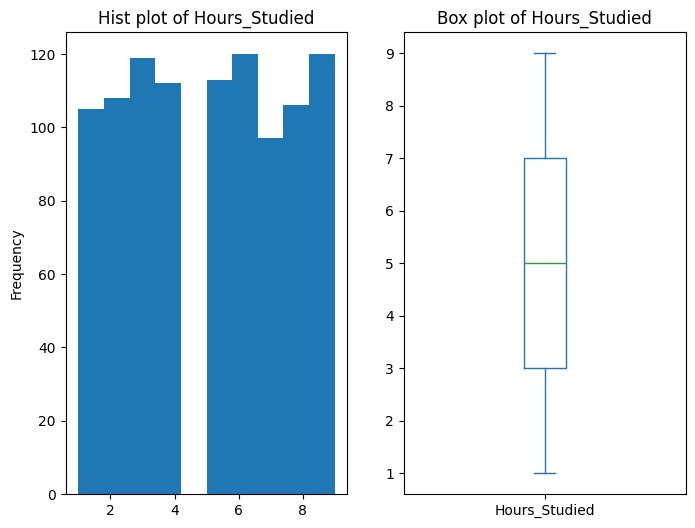

=====
central tendency of Previous_Scores: {'mean': 70.539, 'median': 71.0, 'mode': 54, 'min': 29, 'max': 99, 'range': 70}
=====
Dispersion of Previous_Scores: 
 {'range': 70, 'q1': 56.0, 'q3': 86.0, 'iqr': 30.0, 'var': 298.08656556556554, 'skew': -0.06175560354418661, 'kurtosis': -1.2093654317255462}
=====


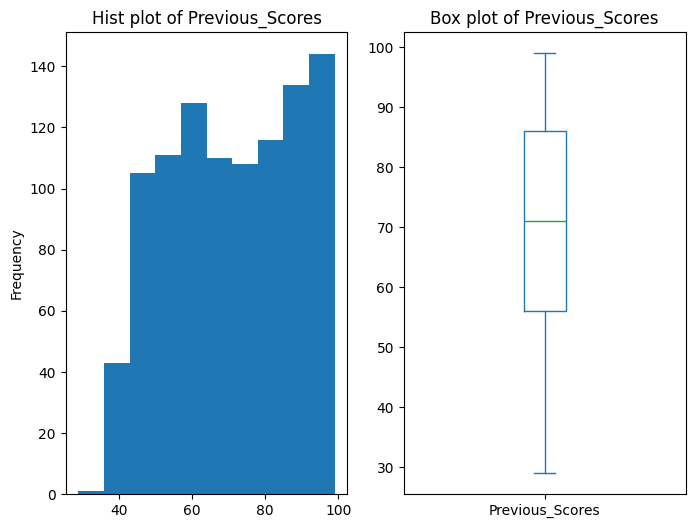

=====
central tendency of Sleep_Hours: {'mean': 6.578, 'median': 6.5, 'mode': 8, 'min': 4, 'max': 60, 'range': 56}
=====
Dispersion of Sleep_Hours: 
 {'range': 56, 'q1': 5.0, 'q3': 8.0, 'iqr': 3.0, 'var': 6.804720720720721, 'skew': 10.680011390939834, 'kurtosis': 201.5703258147507}
=====


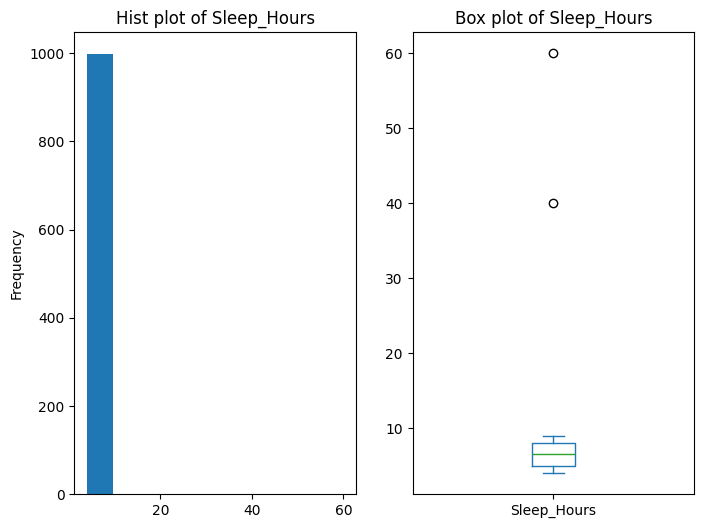

=====
central tendency of Sample_Question_Papers_Practiced: {'mean': 4.555, 'median': 5.0, 'mode': 6, 'min': 0, 'max': 9, 'range': 9}
=====
Dispersion of Sample_Question_Papers_Practiced: 
 {'range': 9, 'q1': 2.0, 'q3': 7.0, 'iqr': 5.0, 'var': 8.251226226226224, 'skew': -0.04301666222269833, 'kurtosis': -1.2058169805869643}
=====


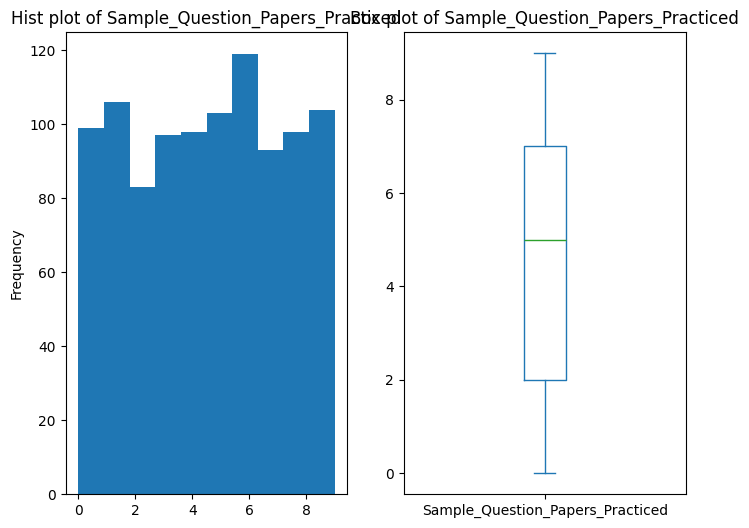

=====
central tendency of Performance_Index: {'mean': 56.409, 'median': 57.0, 'mode': 67, 'min': 11, 'max': 100, 'range': 89}
=====
Dispersion of Performance_Index: 
 {'range': 89, 'q1': 41.0, 'q3': 72.0, 'iqr': 31.0, 'var': 380.7364554554555, 'skew': -0.09108341183729761, 'kurtosis': -0.889653493864047}
=====


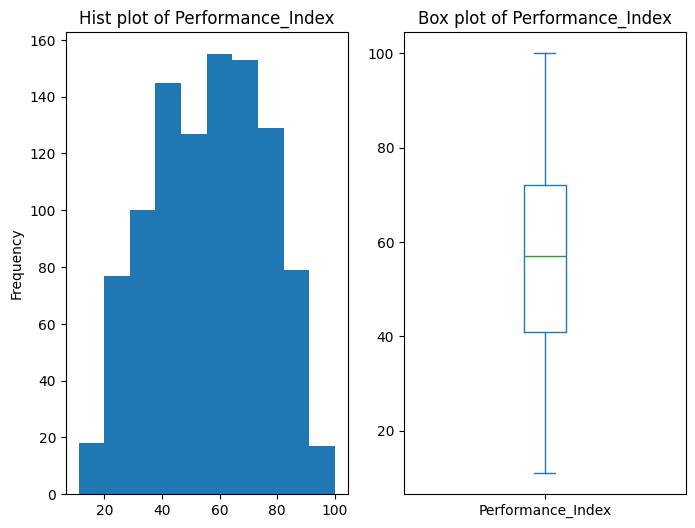

In [12]:
# _analyzer.analyze_numeric_variable(variable_name='Tên biến', df='Tên DataFrame')
# variable_name: tên biến liên tục cần phân tích - kiểu  chuỗi (string)
# df: dataframe chứa biến liên tục cần phân tích  - kiểu dataframe pandas  

for col in numerical_vars :
    _analyzer.analyze_numeric_variable(variable_name=col, df=data)



#### Phân tích đơn biến phân loại

Class count of Extracurricular_Activities:

No     518
Yes    479
Name: Extracurricular_Activities, dtype: int64


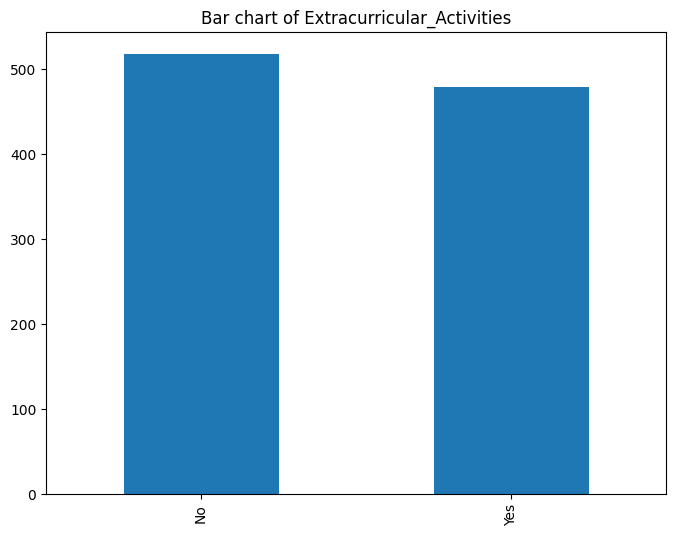

Class count of Gender:

Female    559
Male      441
Name: Gender, dtype: int64


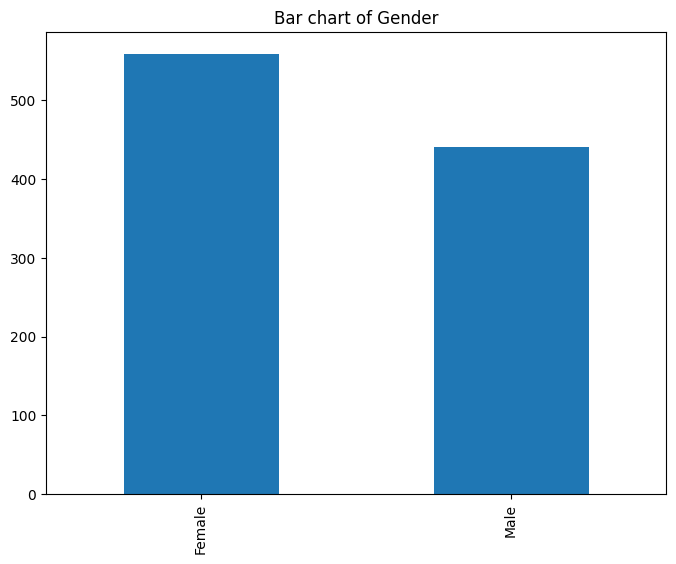

In [13]:
#_analyzer.analyze_category_variable(variable_name='Tên biến', df='Tên DataFrame')
# variable_name: tên biến phân loại cần phân tích - kiểu  chuỗi (string)
# df: dataframe chứa biến phân loại cần phân tích  - kiểu dataframe pandas 
for col in categorical_vars : 
    _analyzer.analyze_category_variable(variable_name=col, df=data)


#### Phân tích đa biến phân loại vs phân loại

In [14]:
# _analyzer.analyze_category_vs_category(var1='Tên biến 1', var2='Tên biến 2', df='Tên DataFrame')
# var1: tên biến phân loại 1 cần phân tích - kiểu  chuỗi (string)
# var2: tên biến phân loại 2 cần phân tích - kiểu  chuỗi (string)
# df: dataframe chứa cả 2 biến phân loại cần phân tích  - kiểu dataframe pandas


=====Analyze of Extracurricular_Activities and Gender=====


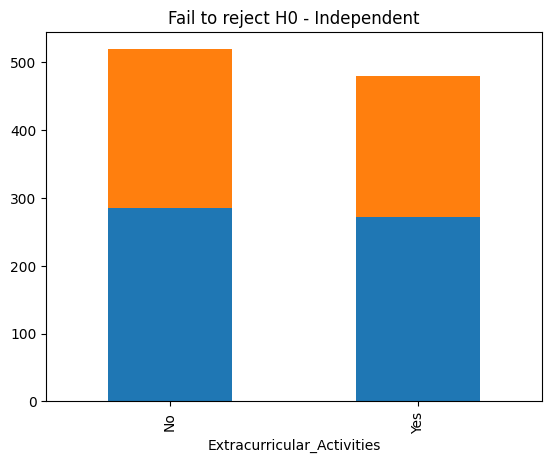

{'var1': 'Extracurricular_Activities',
 'var2': 'Gender',
 'result': 'Fail to reject H0 - Independent'}

In [13]:
_analyzer.analyze_category_vs_category(var1='Extracurricular_Activities', var2='Gender', df=data)

In [16]:
# _analyzer.analyze_continous_vs_categories(continous_var='Tên biến liên tục', 
#                                           category_vars=['Tên biến phân loại 1', 'Tên biến phân loại 2'], 
#                                           df='Tên DataFrame')
# continous_var: tên biến liên tục cần phân tích - kiểu  chuỗi (string)
# category_vars: danh sách hoặc tên biến phân loại cần phân tích - kiểu danh sách (list)  hoặc kiểu  chuỗi (string)
# df: dataframe chứa biến phân loại và biến liên tục cần phân tích  - kiểu dataframe pandas  


                                              sum_sq     df         F  \
C(Extracurricular_Activities)              10.171380    1.0  1.536830   
C(Gender)                                   8.387469    1.0  1.267293   
C(Extracurricular_Activities):C(Gender)     4.999692    1.0  0.755421   
Residual                                 6572.085856  993.0       NaN   

                                           PR(>F)  
C(Extracurricular_Activities)            0.215383  
C(Gender)                                0.260547  
C(Extracurricular_Activities):C(Gender)  0.384975  
Residual                                      NaN  


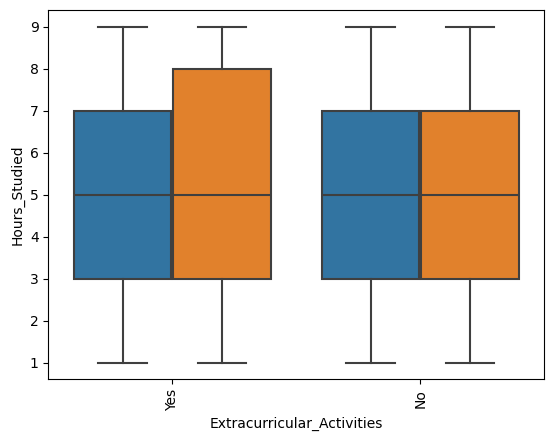

                                                sum_sq     df         F  \
C(Extracurricular_Activities)               120.261833    1.0  0.402551   
C(Gender)                                    12.812838    1.0  0.042888   
C(Extracurricular_Activities):C(Gender)     137.151960    1.0  0.459087   
Residual                                 296658.243918  993.0       NaN   

                                           PR(>F)  
C(Extracurricular_Activities)            0.525921  
C(Gender)                                0.835978  
C(Extracurricular_Activities):C(Gender)  0.498209  
Residual                                      NaN  


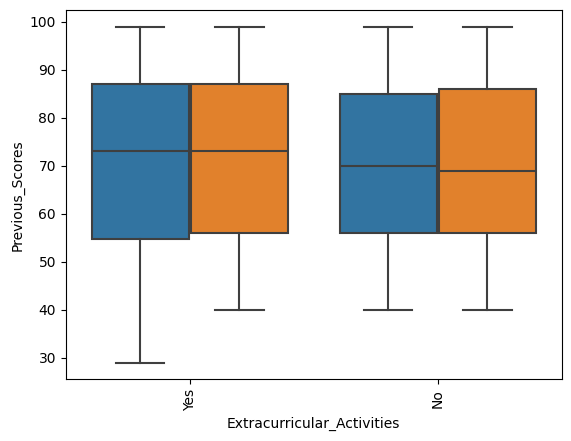

                                              sum_sq     df         F  \
C(Extracurricular_Activities)               1.239874    1.0  0.181629   
C(Gender)                                   7.412760    1.0  1.085892   
C(Extracurricular_Activities):C(Gender)     0.578162    1.0  0.084695   
Residual                                 6778.636652  993.0       NaN   

                                           PR(>F)  
C(Extracurricular_Activities)            0.670070  
C(Gender)                                0.297637  
C(Extracurricular_Activities):C(Gender)  0.771094  
Residual                                      NaN  


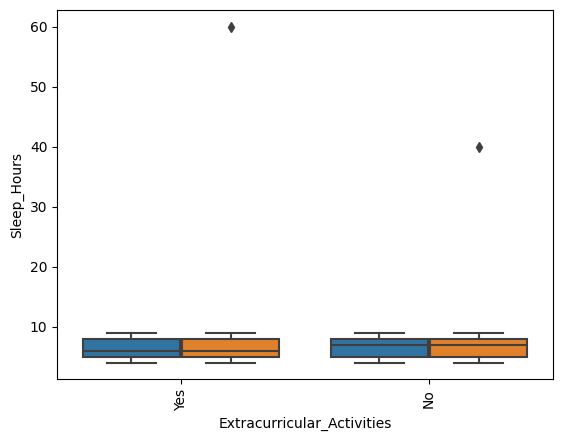

                                              sum_sq     df         F  \
C(Extracurricular_Activities)              11.976889    1.0  1.454368   
C(Gender)                                   4.179333    1.0  0.507501   
C(Extracurricular_Activities):C(Gender)     9.567955    1.0  1.161848   
Residual                                 8177.469029  993.0       NaN   

                                           PR(>F)  
C(Extracurricular_Activities)            0.228116  
C(Gender)                                0.476390  
C(Extracurricular_Activities):C(Gender)  0.281344  
Residual                                      NaN  


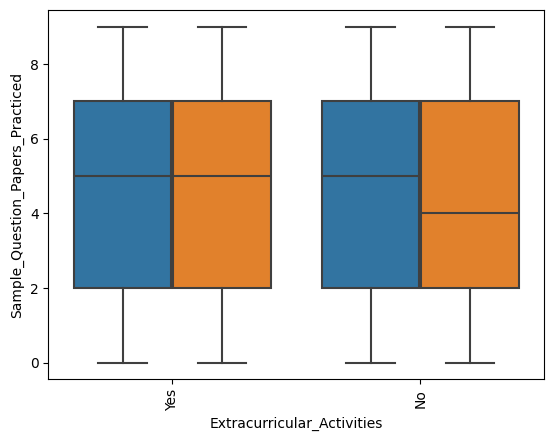

                                                sum_sq     df         F  \
C(Extracurricular_Activities)               960.644365    1.0  2.517812   
C(Gender)                                   203.553594    1.0  0.533506   
C(Extracurricular_Activities):C(Gender)      30.828497    1.0  0.080800   
Residual                                 378868.652138  993.0       NaN   

                                           PR(>F)  
C(Extracurricular_Activities)            0.112885  
C(Gender)                                0.465309  
C(Extracurricular_Activities):C(Gender)  0.776275  
Residual                                      NaN  


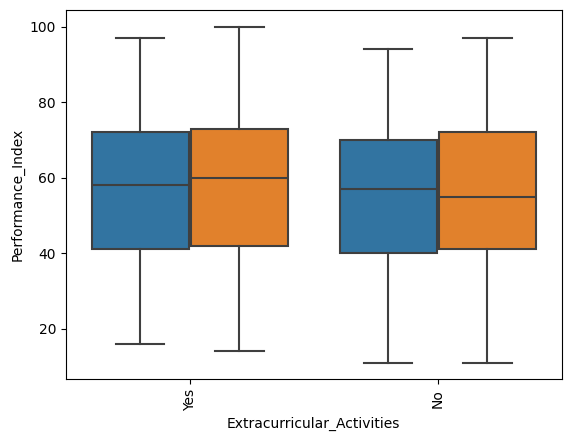

In [17]:
for col in numerical_vars :
    _analyzer.analyze_continous_vs_categories(continous_var=col,category_vars=categorical_vars, df=data)

#### Phân tích đa biến liên tục vs liên tục

In [14]:
data.corr()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
Hours_Studied,1.000000,0.051397,-0.018840,0.000813,0.425175
Previous_Scores,0.051397,1.000000,0.036772,-0.026484,0.918146
Sleep_Hours,-0.018840,0.036772,1.000000,0.007910,0.053189
Sample_Question_Papers_Practiced,0.000813,-0.026484,0.007910,1.000000,0.005286
Performance_Index,0.425175,0.918146,0.053189,0.005286,1.000000


In [19]:
numerical_vars

['Hours_Studied',
 'Previous_Scores',
 'Sleep_Hours',
 'Sample_Question_Papers_Practiced',
 'Performance_Index']

In [24]:
### Biến liên tục với biến liên tục 
for col1 in numerical_vars:
    for col2 in numerical_vars:
        if col1 != col2:
            corr_value = data[[col1, col2]].corr().iloc[0, 1]
            print(f"Tương quan giữa {col1} và {col2}: {corr_value:.3f}")


Tương quan giữa Hours_Studied và Previous_Scores: 0.051
Tương quan giữa Hours_Studied và Sleep_Hours: -0.019
Tương quan giữa Hours_Studied và Sample_Question_Papers_Practiced: 0.001
Tương quan giữa Hours_Studied và Performance_Index: 0.425
Tương quan giữa Previous_Scores và Hours_Studied: 0.051
Tương quan giữa Previous_Scores và Sleep_Hours: 0.037
Tương quan giữa Previous_Scores và Sample_Question_Papers_Practiced: -0.026
Tương quan giữa Previous_Scores và Performance_Index: 0.918
Tương quan giữa Sleep_Hours và Hours_Studied: -0.019
Tương quan giữa Sleep_Hours và Previous_Scores: 0.037
Tương quan giữa Sleep_Hours và Sample_Question_Papers_Practiced: 0.008
Tương quan giữa Sleep_Hours và Performance_Index: 0.053
Tương quan giữa Sample_Question_Papers_Practiced và Hours_Studied: 0.001
Tương quan giữa Sample_Question_Papers_Practiced và Previous_Scores: -0.026
Tương quan giữa Sample_Question_Papers_Practiced và Sleep_Hours: 0.008
Tương quan giữa Sample_Question_Papers_Practiced và Performa

In [21]:
# Mở rộng (dùng itertools.combinations)
from itertools import combinations

for col1, col2 in combinations(numerical_vars, 2):
    corr_value = data[[col1, col2]].corr().iloc[0, 1]
    print(f"Tương quan giữa {col1} và {col2}: {corr_value:.3f}")

Tương quan giữa Hours_Studied và Previous_Scores: 0.051
Tương quan giữa Hours_Studied và Sleep_Hours: -0.019
Tương quan giữa Hours_Studied và Sample_Question_Papers_Practiced: 0.001
Tương quan giữa Hours_Studied và Performance_Index: 0.425
Tương quan giữa Previous_Scores và Sleep_Hours: 0.037
Tương quan giữa Previous_Scores và Sample_Question_Papers_Practiced: -0.026
Tương quan giữa Previous_Scores và Performance_Index: 0.918
Tương quan giữa Sleep_Hours và Sample_Question_Papers_Practiced: 0.008
Tương quan giữa Sleep_Hours và Performance_Index: 0.053
Tương quan giữa Sample_Question_Papers_Practiced và Performance_Index: 0.005


In [22]:
# Kết quả dạng bảng (DataFrame)
results = []
for col1, col2 in combinations(numerical_vars, 2):
    corr_value = data[[col1, col2]].corr().iloc[0, 1]
    results.append({'Var1': col1, 'Var2': col2, 'Correlation': corr_value})

correlation_df = pd.DataFrame(results)
display(correlation_df)

,Var1,Var2,Correlation
0,Hours_Studied,Previous_Scores,0.051397
1,Hours_Studied,Sleep_Hours,-0.018840
2,Hours_Studied,Sample_Question_Papers_Practiced,0.000813
3,Hours_Studied,Performance_Index,0.425175
4,Previous_Scores,Sleep_Hours,0.036772
5,Previous_Scores,Sample_Question_Papers_Practiced,-0.026484
6,Previous_Scores,Performance_Index,0.918146
7,Sleep_Hours,Sample_Question_Papers_Practiced,0.007910
8,Sleep_Hours,Performance_Index,0.053189
9,Sample_Question_Papers_Practiced,Performance_Index,0.005286
